#1.Data Preprocessing

In [25]:

import os
import pandas as pd
import numpy as np
from scipy import signal
import glob  

all_data = []
all_names = []
for folder in os.listdir(r'C:\1st SEM subjs\FDA\project3\bonn'):
    for file in glob.glob(os.path.join(r'C:\1st SEM subjs\FDA\project3\bonn', folder, '*.txt')):
        data = np.loadtxt(file)
        all_data.append(data)
        all_names.append(folder)
all_data=np.array(all_data)

In [26]:
all_data

array([[  34.,   33.,   28., ...,   39.,   41.,    7.],
       [  60.,   47.,   38., ...,  149.,  126.,   42.],
       [  26.,   16.,   13., ...,  114.,   99., -130.],
       ...,
       [ -51.,  -42.,  -39., ...,   -2.,    0.,  -49.],
       [  56.,   55.,   38., ...,  -32.,   -4.,   69.],
       [ -36.,  -71., -120., ...,    3.,  -13.,   30.]])

In [27]:
all_names

['F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

PLOTTING THE EEG SIGNALS

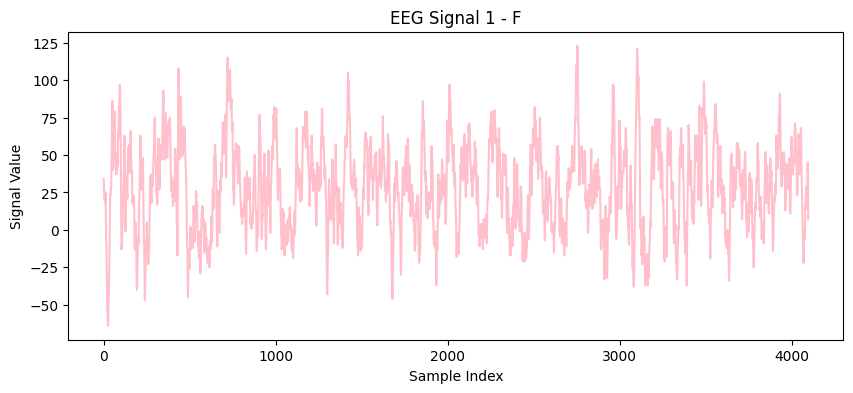

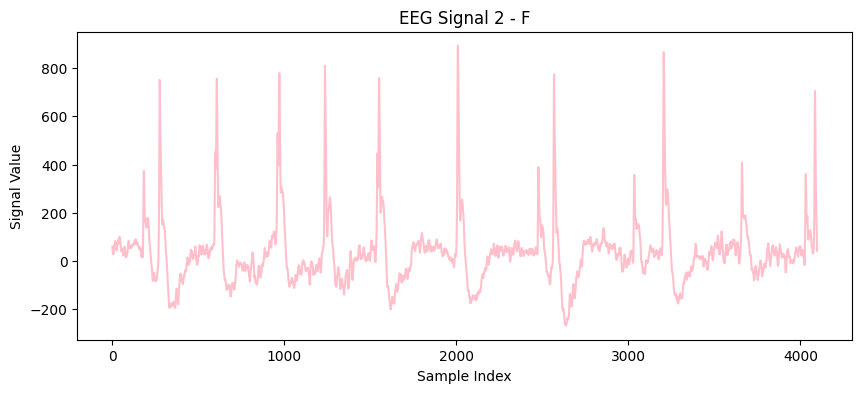

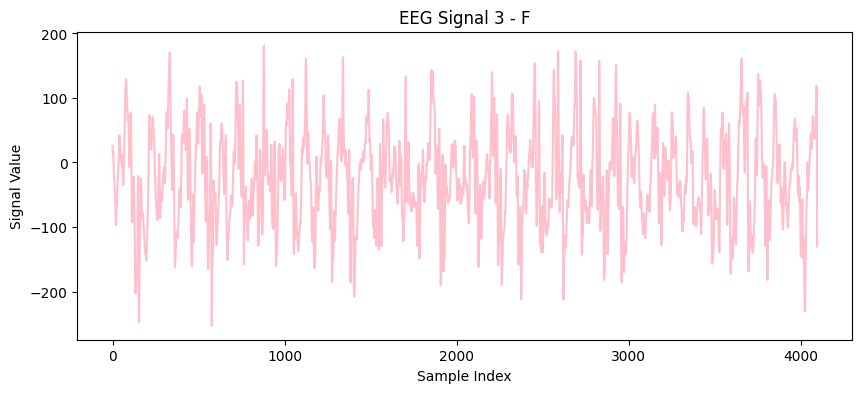

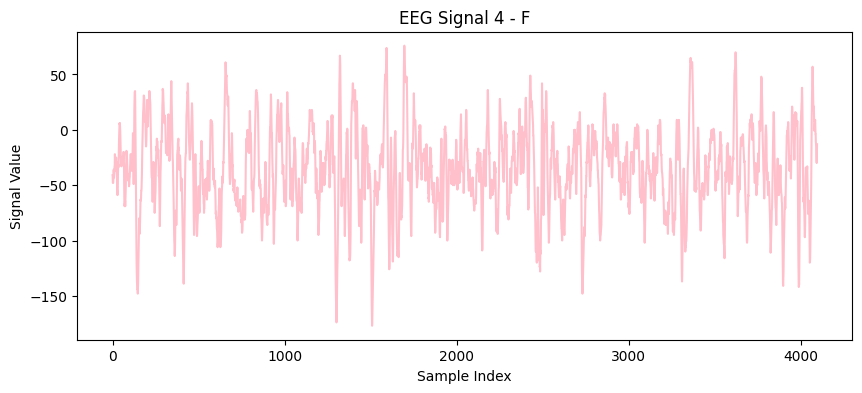

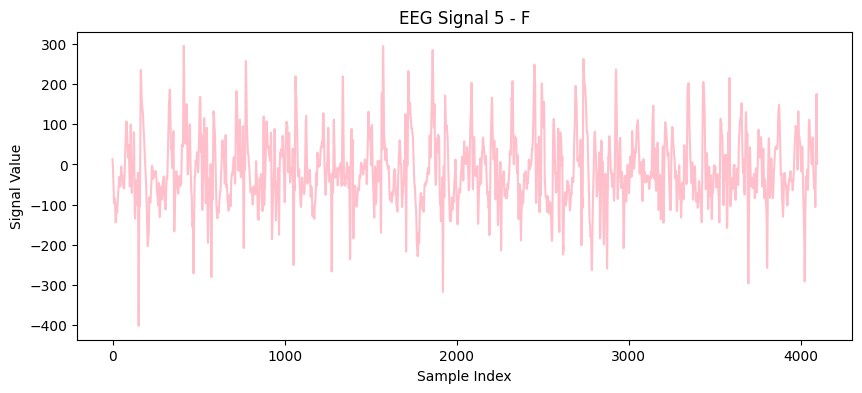

In [28]:
import matplotlib.pyplot as plt

# Define the number of signals to plot
num_signals_to_plot = 5

# Plot each EEG signal separately
for i in range(min(num_signals_to_plot, all_data.shape[0])):
    plt.figure(figsize=(10, 4))
    plt.plot(all_data[i, :],color='pink')
    plt.title(f'EEG Signal {i + 1} - {all_names[i]}')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    plt.show()

CHECKING FOR MISSSING VALUES

In [29]:
#1.3 If necessary, preprocess the EEG data, including handling missing values, noise
#reduction, and data augmentation.
# Check for missing values
missing_values = np.isnan(all_data).sum()
print("Missing Values:\n", missing_values)

Missing Values:
 0


PREPROCESSING THE EEG DATA

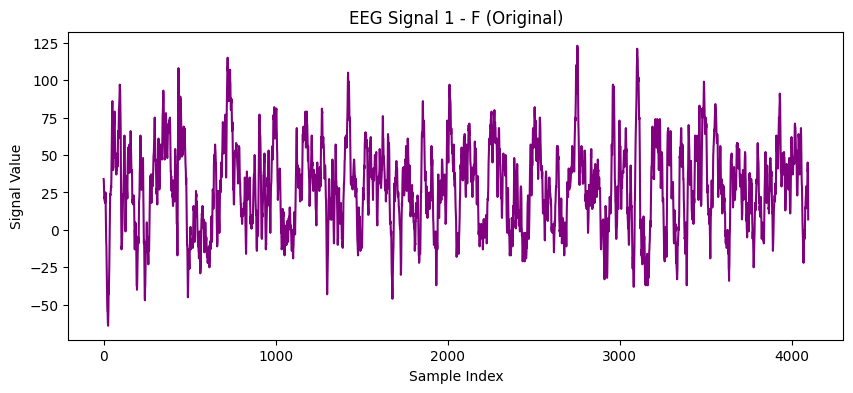

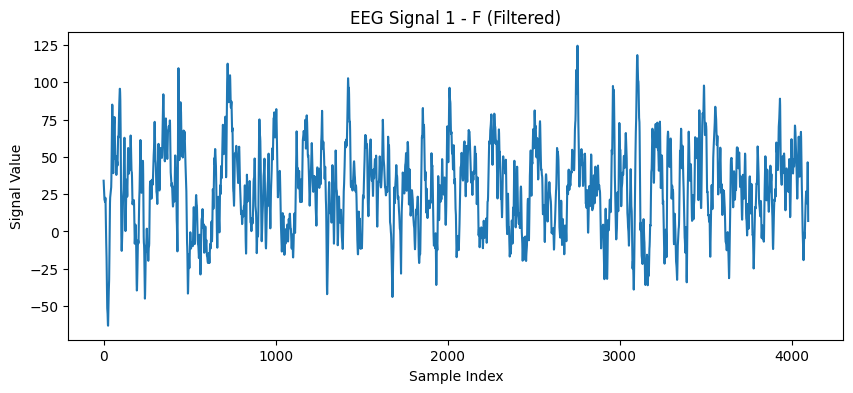

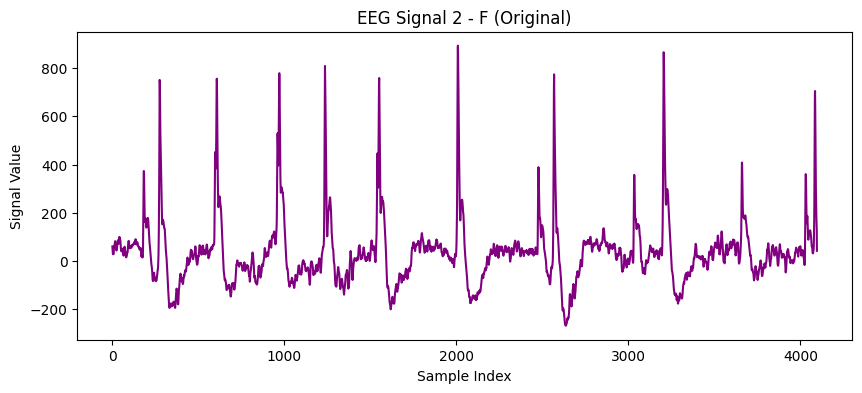

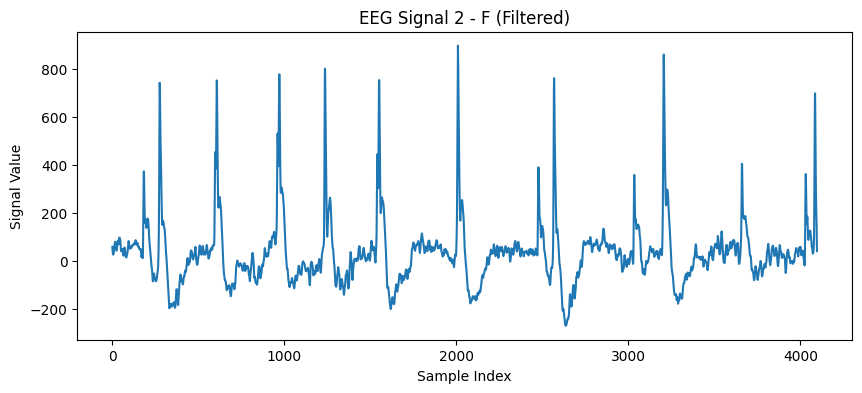

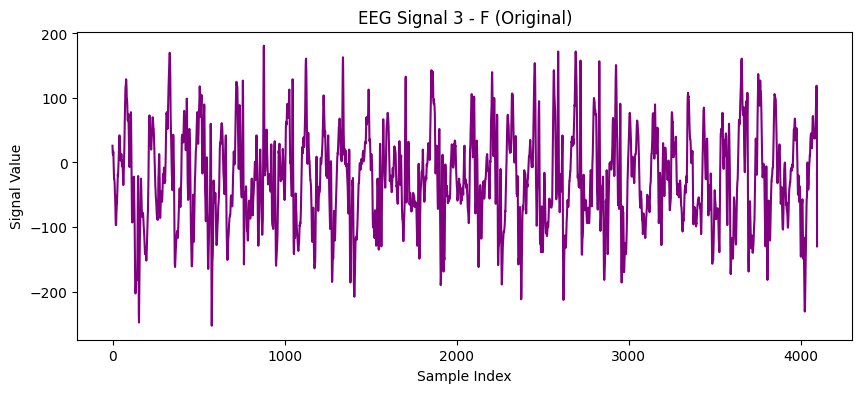

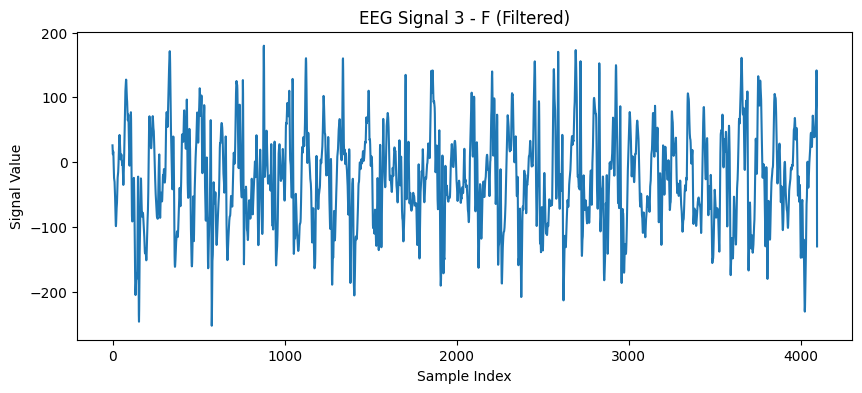

In [31]:
# Preprocess the EEG data
# Example: Applying a low-pass filter to each sample independently
fs = 250 
cutoff_freq = 50 
b, a = signal.butter(4, cutoff_freq / (fs / 2), 'low')

# Apply the filter to each EEG sample
all_data_filtered = signal.filtfilt(b, a, all_data)

# Plotting a few samples
num_samples_to_plot = 3

for i in range(min(num_samples_to_plot, all_data.shape[0])):
    plt.figure(figsize=(10, 4))
    plt.plot(all_data[i, :],color='purple')  # Plotting the original signal
    plt.title(f'EEG Signal {i + 1} - {all_names[i]} (Original)')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(all_data_filtered[i, :])  # Plotting the filtered signal
    plt.title(f'EEG Signal {i + 1} - {all_names[i]} (Filtered)')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    plt.show()

DISPLAYING THE BASIC INFORMATION ABOUT DATA

Data shape: (500, 4097)
Summary statistics:
              0            1            2            3            4     \
count  500.000000   500.000000   500.000000   500.000000   500.000000   
mean    -3.718000    -9.802000   -16.094000   -18.820000   -16.662000   
std    145.274622   163.176469   188.246611   201.245888   188.973686   
min   -985.000000 -1221.000000 -1406.000000 -1395.000000 -1291.000000   
25%    -48.250000   -54.000000   -52.000000   -52.250000   -53.000000   
50%     -8.000000    -8.000000    -7.000000    -9.000000    -8.500000   
75%     36.000000    36.250000    37.250000    38.000000    41.000000   
max    800.000000   839.000000   857.000000   876.000000   893.000000   

             5           6            7            8            9     ...  \
count  500.000000  500.000000   500.000000   500.000000   500.000000  ...   
mean   -12.124000   -6.510000    -2.142000     1.882000     4.438000  ...   
std    165.080719  153.637922   155.370054   155.850617   155.8828

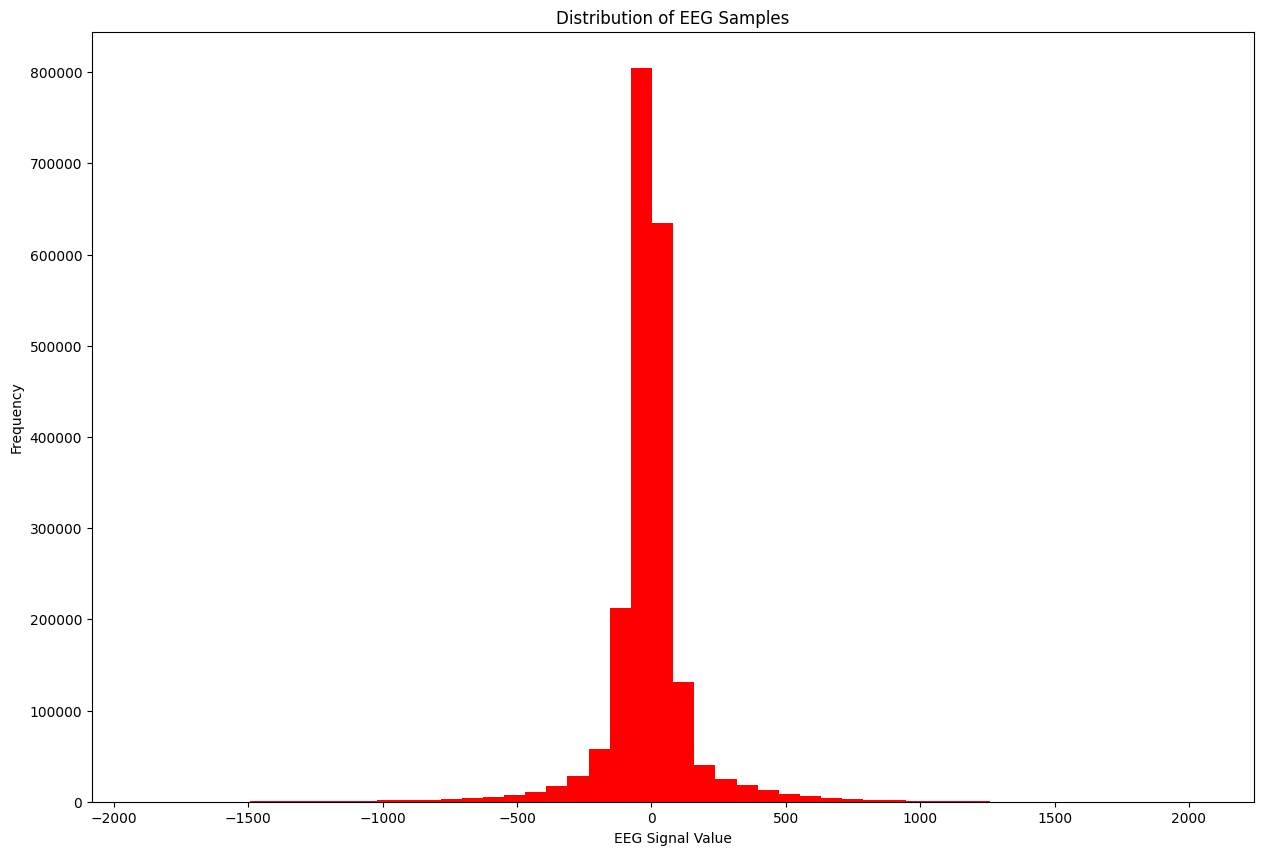

In [32]:
# Display basic information about the data
print("Data shape:", all_data.shape)

# Display summary statistics
print("Summary statistics:\n", pd.DataFrame(all_data).describe())

# Check for missing values
missing_values = np.isnan(all_data).sum()
print("Missing Values:\n", missing_values)

# Visualize the distribution of EEG samples
plt.figure(figsize=(15, 10))
plt.hist(all_data.flatten(), bins=50,color='red')
plt.title('Distribution of EEG Samples')
plt.xlabel('EEG Signal Value')
plt.ylabel('Frequency')
plt.show()

FEATURE EXTRACTION

In [33]:
#2. Feature Extraction: Extract relevant features from the EEG signals. 
#Considered time-domain and frequency-domain features.
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import welch

def extract_time_domain_features(signal):
    mean_value = np.mean(signal)
    std_deviation = np.std(signal)
    skewness = skew(signal)
    kurt = kurtosis(signal)
    rms = np.sqrt(np.mean(np.square(signal)))
    
    return [mean_value, std_deviation, skewness, kurt, rms]

def extract_frequency_domain_features(signal, sampling_rate):
    freq, power_density = welch(signal, fs=sampling_rate, nperseg=256)
    
    # Extracting features from the power spectral density
    max_power_freq = freq[np.argmax(power_density)]
    total_power = np.sum(power_density)
    normalized_power = power_density / total_power
    
    # Calculating spectral entropy
    spectral_entropy = -np.sum(normalized_power * np.log2(normalized_power))
    
    return [max_power_freq, spectral_entropy]


sampling_rate = 250

# Assuming all_data is 2D array of EEG signals
for i in range(all_data.shape[0]):
    signal = all_data[i, :]
    
    # Extracting time-domain features
    time_domain_features = extract_time_domain_features(signal)
    
    # Extracting frequency-domain features
    frequency_domain_features = extract_frequency_domain_features(signal, sampling_rate)
    
    # Combining features into a single feature vector
    all_features = time_domain_features + frequency_domain_features
    
    print(f"Features for EEG Signal {i + 1}: {all_features}")

Features for EEG Signal 1: [28.570417378569687, 28.62507053383784, 0.0836471667718495, -0.18072031920125964, 40.443335820044176, 0.9765625, 3.7794442910807033]
Features for EEG Signal 2: [31.778374420307543, 133.47572179796714, 2.184076080531281, 8.93430826413078, 137.20653552322344, 0.9765625, 3.2296136578493444]
Features for EEG Signal 3: [-25.015865267268733, 71.95809056217087, 0.04984613338982067, -0.25497430735385773, 76.18241471903949, 1.953125, 3.6064092973185655]
Features for EEG Signal 4: [-35.25213570905541, 37.80157249426841, -0.14066049530938735, 0.3333998165038823, 51.688218726215446, 1.953125, 3.8381435334165723]
Features for EEG Signal 5: [-15.550646814742494, 84.28527598177443, 0.3154616536319146, 0.9611821233312301, 85.70781973472866, 2.9296875, 4.361669283221834]
Features for EEG Signal 6: [-33.69123749084696, 22.86761048579896, -0.08668033643854081, 0.0735681382360096, 40.71887882782229, 7.8125, 3.892058465106018]
Features for EEG Signal 7: [-27.657310226995364, 38.7

SPLITTING THE DATA

In [34]:
#3.Split the data into training, validation, and test sets:

from sklearn.model_selection import train_test_split

# Assuming labels are stored in all_names array
labels = np.array(all_names)

# Health labels: 'z' and 'o'
health_labels = np.isin(labels, ['Z', 'O'])

# Seizure labels: 'n', 'f', 's'
seizure_labels = np.isin(labels, ['N', 'F', 'S'])

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_data, health_labels, test_size=0.4, random_state=42, stratify=health_labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (300, 4097)
Validation set shape: (100, 4097)
Test set shape: (100, 4097)


MODEL SELECTION

In [35]:
#4.Model Selection:
#Choose an appropriate machine learning or deep learning model for EEG
#classification. Consider models like Convolutional Neural Networks (CNNs) or
#Recurrent Neural Networks (RNNs).

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense
from sklearn.metrics import accuracy_score

# Reshaping data for compatibility with 1D CNN and LSTM
X_train_cnn = X_train[:, :, np.newaxis]
X_val_cnn = X_val[:, :, np.newaxis]
X_test_cnn = X_test[:, :, np.newaxis]

# Defining a simple 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling and training the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_cnn, y_val))

# Predicting on the test set
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Evaluating the CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Accuracy of CNN model: {accuracy_cnn}")

# Defining a simple LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

# Reshaping data for compatibility with LSTM
X_train_lstm = X_train[:, :, np.newaxis]
X_val_lstm = X_val[:, :, np.newaxis]
X_test_lstm = X_test[:, :, np.newaxis]

Epoch 1/10


c:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5745 - loss: 646.3426 - val_accuracy: 0.4000 - val_loss: 0.6933
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4128 - loss: 0.6855 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3911 - loss: 0.6934 - val_accuracy: 0.4000 - val_loss: 0.6932
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4573 - loss: 0.6932 - val_accuracy: 0.6000 - val_loss: 0.6929
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6188 - loss: 0.6928 - val_accuracy: 0.6000 - val_loss: 0.6925
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6301 - loss: 0.6921 - val_accuracy: 0.6000 - val_loss: 0.6919
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5963 - loss: 0.6919 - val_accuracy: 0.6000 - val_loss: 0.6915
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6200 - loss: 0.6910 - val_accuracy: 0.6000 - val_loss: 

c:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MODEL TRAINING

In [36]:
#5. MODEL TRAINING:

# Compiling and train the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))

# Predicting on the test set
y_pred_lstm_probs = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int)

# Evaluating the LSTM model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"Accuracy of LSTM model: {accuracy_lstm}")

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 736ms/step - accuracy: 0.4660 - loss: 0.7080 - val_accuracy: 0.5900 - val_loss: 0.6685
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 578ms/step - accuracy: 0.6210 - loss: 0.6666 - val_accuracy: 0.6300 - val_loss: 0.6460
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 713ms/step - accuracy: 0.6763 - loss: 0.6330 - val_accuracy: 0.6000 - val_loss: 0.6376
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 649ms/step - accuracy: 0.6835 - loss: 0.6306 - val_accuracy: 0.6100 - val_loss: 0.6291
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 679ms/step - accuracy: 0.6993 - loss: 0.6033 - val_accuracy: 0.6200 - val_loss: 0.6221
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 665ms/step - accuracy: 0.7514 - loss: 0.5586 - val_accuracy: 0.6500 - val_loss: 0.6033
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 620ms/step - accuracy: 0.7421 - loss: 0.5625 - val_accuracy: 0.6600 - val_loss: 0.5833
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 675ms/step - accuracy: 0.7699 - loss: 0.5132 - val_accuracy: 0.

CLASSIFICATION REPORT FOR CNN MODEL

In [37]:
from sklearn.metrics import classification_report
# Predicting on the test set using CNN model
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Generating the classification report for CNN model
report_cnn = classification_report(y_test, y_pred_cnn)
print("Classification Report for CNN Model:")
print(report_cnn)

# Predicting on the test set using LSTM model
y_pred_lstm_probs = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int)

# Generating the classification report for LSTM model
report_lstm = classification_report(y_test, y_pred_lstm)
print("Classification Report for LSTM Model:")
print(report_lstm)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Classification Report for CNN Model:
              precision    recall  f1-score   support

       False       0.60      1.00      0.75        60
        True       0.00      0.00      0.00        40

    accuracy                           0.60       100
   macro avg       0.30      0.50      0.38       100
weighted avg       0.36      0.60      0.45       100



c:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step
Classification Report for LSTM Model:
              precision    recall  f1-score   support

       False       0.89      0.95      0.92        60
        True       0.92      0.82      0.87        40

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



MODEL EVALUATION

In [38]:
#6. Model Evaluation

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Implement early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model with early stopping
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32,
                         validation_data=(X_val_lstm, y_val),
                         callbacks=[early_stopping])

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 702ms/step - accuracy: 0.8542 - loss: 0.3947 - val_accuracy: 0.7900 - val_loss: 0.4940
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 715ms/step - accuracy: 0.8794 - loss: 0.3621 - val_accuracy: 0.8600 - val_loss: 0.4000
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 672ms/step - accuracy: 0.8589 - loss: 0.3716 - val_accuracy: 0.7700 - val_loss: 0.5282
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 702ms/step - accuracy: 0.8675 - loss: 0.3576 - val_accuracy: 0.8000 - val_loss: 0.4850
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 685ms/step - accuracy: 0.8307 - loss: 0.3874 - val_accuracy: 0.8200 - val_loss: 0.4160


MODEL TESTING

In [39]:
#7. TESTING:
# Predict on the validation set
y_pred_lstm_probs = lstm_model.predict(X_val_lstm)
y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int)

# Evaluate the LSTM model on the validation set
accuracy_lstm = accuracy_score(y_val, y_pred_lstm)
precision_lstm = precision_score(y_val, y_pred_lstm)
recall_lstm = recall_score(y_val, y_pred_lstm)
f1_lstm = f1_score(y_val, y_pred_lstm)

print(f"Validation Accuracy of LSTM model: {accuracy_lstm}")
print(f"Validation Precision of LSTM model: {precision_lstm:.2f}")
print(f"Validation Recall of LSTM model: {recall_lstm}")
print(f"Validation F1 Score of LSTM model: {f1_lstm:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step
Validation Accuracy of LSTM model: 0.86
Validation Precision of LSTM model: 0.78
Validation Recall of LSTM model: 0.9
Validation F1 Score of LSTM model: 0.84


VISUALIZATION

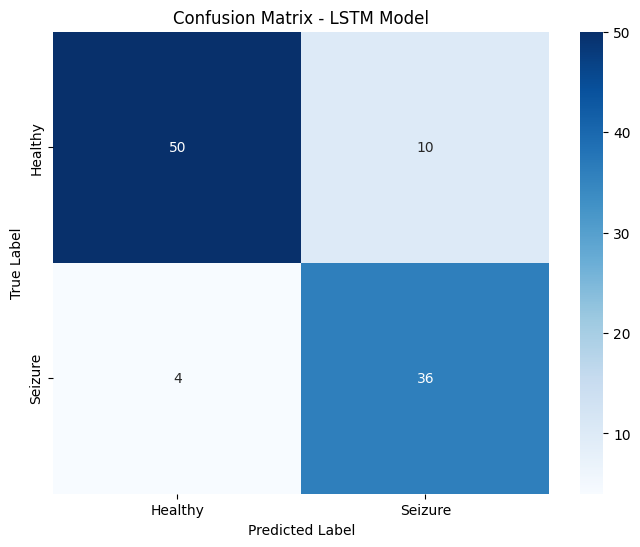

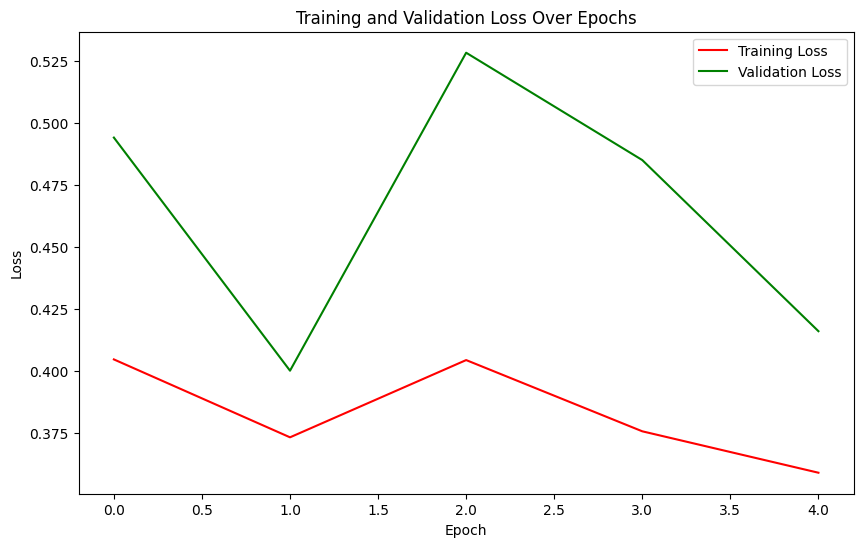

In [40]:
#8. Results and Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
conf_mat_lstm = confusion_matrix(y_val, y_pred_lstm)
sns.heatmap(conf_mat_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Seizure'], yticklabels=['Healthy', 'Seizure',],color='purple')
plt.title('Confusion Matrix - LSTM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss',color='red')
plt.plot(history.history['val_loss'], label='Validation Loss',color='green')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()